# Зменшення розмірності даних за допомогою МГК

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_spss('Data_prodjWork_copy.sav')

In [4]:
df.dtypes

Men_Wom                        float64
Wik                            float64
Year                    datetime64[ns]
Time_happen_fut_1              float64
SEO_SELF_ALL                   float64
SEO_SELF_ALL_Mean              float64
Estimate_positive              float64
Estimate_negative              float64
Probabipity_negative           float64
Probabipity_positive           float64
SEO_Posit_social               float64
SEO_Posit_individual           float64
SEO_Posit_prestize             float64
SEO_Negative_work              float64
SEO_Negative_individ           float64
SEO_Negative_social            float64
SEO_ALL_GROUP                  float64
dtype: object

Скорочення розмірності для позитивних показників

In [5]:
feature_cols = [ 'SEO_Posit_social', 'SEO_Posit_individual', 'SEO_Posit_prestize']
X = df[feature_cols] # незалежні змінні


In [6]:
X = StandardScaler().fit_transform(X)

In [7]:
from sklearn.decomposition import PCA
pca_optimism = PCA(n_components=2)
principalComponents_optimism = pca_optimism.fit_transform(X)

Записую результати РСА у нову базу даних

In [8]:
principal_optimism_Df = pd.DataFrame(data = principalComponents_optimism
             , columns = ['principal component 1', 'principal component 2'])

In [12]:
print('Explained variation per principal component: {}'.format(pca_optimism.explained_variance_ratio_))

Explained variation per principal component: [0.65477649 0.22577362]


In [9]:
principal_optimism_Df

,principal component 1,principal component 2
0,-2.347728,0.093789
1,-2.924542,0.000855
2,-1.992727,0.759581
3,-1.362061,1.293494
4,-1.557912,1.076311
...,...,...
1025,0.509582,-0.177849
1026,-0.053218,-0.197871
1027,0.126042,0.279581
1028,0.842855,-0.833922


In [10]:
finalDf = principal_optimism_Df#скорочую назву бази даних

Виводжу графічний розподіл результаів стосовно двох чинників

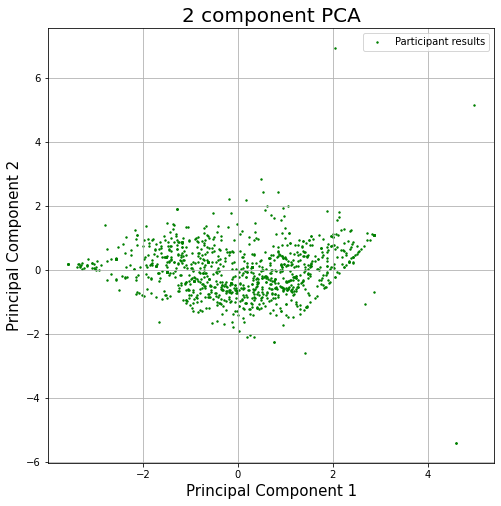

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Participant results']
colors = ['g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf.index
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s =2)
ax.legend(targets)
ax.grid()
fig.savefig("mlpr_0105.png", dpi = 300,  bbox_inches="tight")

Скорочення розмірності для позитивних показників

In [13]:
feature_cols1 = [ 'SEO_Negative_work', 'SEO_Negative_individ', 'SEO_Negative_social']
X1 = df[feature_cols] # незалежні змінні
y1 = df['SEO_ALL_GROUP'] # залежна змінна

In [14]:
from sklearn.decomposition import PCA
pca_pesimism = PCA(n_components=2)
principalComponents_pesimism = pca_pesimism.fit_transform(X1)

In [15]:
principal_pesimism_Df = pd.DataFrame(data = principalComponents_pesimism
             , columns = ['principal component 1', 'principal component 2'])

In [16]:
print('Explained variation per principal component: {}'.format(pca_pesimism.explained_variance_ratio_))

Explained variation per principal component: [0.73616569 0.1578092 ]


In [17]:
finalDf1 = principal_pesimism_Df

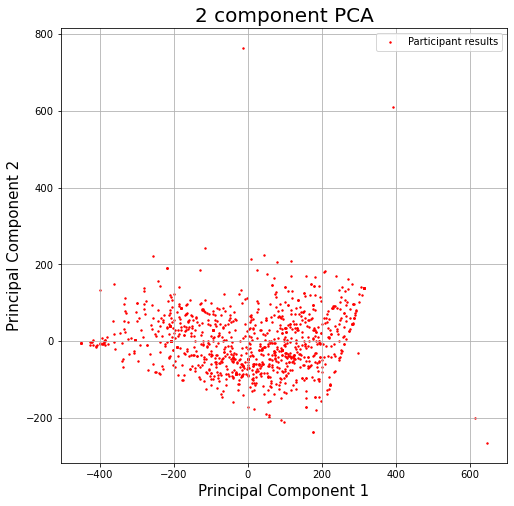

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Participant results']
colors = ['r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf1.index
    ax.scatter(finalDf1.loc[indicesToKeep, 'principal component 1']
               , finalDf1.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s =2)
ax.legend(targets)
ax.grid()
fig.savefig("mlpr_0106.png", dpi = 300,  bbox_inches="tight")